In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [133]:
import warnings
warnings.filterwarnings(action='ignore')

## 10-1-3 단층 퍼셉트론

In [134]:
# 초기에는 입력값에 따른 가중치들, 편향의 합을 구하고 이후 계단함수를 통해 출력값 냈다.
# 하지만 은닉층이 없는 간단한 단층퍼센트론은 XOR 문제를 풀 수 없었다
# XOR과 같은 문제를 해결하기 위해 은닉층을 추가했고 은닉층이 1개 이상있는 것을 Multilayer Perceptron(MLP)이라고 한다.

In [135]:
# 단층 퍼셉트론은 학습률(0.1)에 따라 가중치를 업데이트하는 SGDClassifier와 같다.(규제도 없음)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
iris = load_iris()
X = iris['data'][:,2:4]
y = (iris['target'] == 0).astype(np.int)

sgd = SGDClassifier(loss = 'perceptron',penalty=None,eta0=0.1,learning_rate='constant')
per_clf = Perceptron()
per_clf.fit(X,y)
sgd.fit(X,y)

y_pred_per = per_clf.predict([[2,0.5]])
y_pred_sgd = sgd.predict([[2,0.5]])

# 아무리 확률적으로 뽑아온다고 해도 값이 너무 다르잖아?
print(y_pred_per)
print(y_pred_sgd)

[0]
[1]


# 케라스로 분류용 다층 퍼셉트론 만들기

In [136]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [137]:
import tensorflow as tf
from tensorflow import keras

In [138]:
fashoin_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashoin_mnist.load_data()

In [139]:
X_train_full.shape

(60000, 28, 28)

In [140]:
X_valid, X_train = (X_train_full[:5000] / 255.0), (X_train_full[5000:] / 255.0)
X_test = (X_test / 255.0)

y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [141]:
class_names = ['tshirts/top', 'trouser','pullover','Dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [142]:
# 시퀀스 모델을 만드는 것으로 가장 간단한 케라스 신경망 모델이다. 순서대로 연결된 층을 일렬로 쌓아서 구성한다.
model = keras.models.Sequential() 

# 첫 번째 층을 만든다. Flatten은 입력 이미지를 1차원으로 변환한다. 즉, 데이터를 받으면 X.reshape(-1,1) 을 계산해준다.
# 또한, 첫 번째 층이기 때문에 input_shape도 지정해야한다. 
model.add(keras.layers.Flatten(input_shape = [28,28]))

# 뉴런 300개를 가진 Dense 은닉층을 추가한다. Dense 층마다 각자 가중치 행렬을 관리한다. 
# 이 행렬에는 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함된다.
# 은닉층 각각의 노드들의 출력층이 300개, 100개, 10개이다. 마지막이 10개인 이유는 class_names의 결과값이 10개이기 때문이다.
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [143]:
# 이렇게 할 수 도 있다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [144]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_61 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_62 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.layers

In [146]:
model.layers[0]

In [147]:
# 위와 같이 모델을 생성한 이후 compile 매서드를 이용해 사용할 손실 함수와 옵티마이저를 지정해야한다.
# 비용함수
# > 목표 레이블이 정수로만 이루어져있고 클래스가 배타적이라면 sparse_categorical_crossentropy를 사용한다. ex) 0,1,2,3,4,5,6,7,8,9
# > 목표 레이블이 one hot encoding이라면 categorical_crossentropy를 사용한다. ex)0,0,0,0,0,1,0,0
# > 목표 레이블이 이진분류 라면, binaray_crossentropy 사용. 또한 이진분류이기 때문에 출력층에 softmax가 아닌 sigmoid가 들어간다.
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd',metrics = ['accuracy'])

In [148]:
X_train.shape

(55000, 28, 28)

In [149]:
history = model.fit(X_train,y_train,batch_size=None,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7404 - accuracy: 0.7598 - val_loss: 0.5264 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4934 - accuracy: 0.8281 - val_loss: 0.4664 - val_accuracy: 0.8366
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4471 - accuracy: 0.8420 - val_loss: 0.4484 - val_accuracy: 0.8414
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4197 - accuracy: 0.8523 - val_loss: 0.4044 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3998 - accuracy: 0.8589 - val_loss: 0.3827 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3833 - accuracy: 0.8653 - val_loss: 0.3780 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3699 - accuracy: 0.8699 - val_loss: 0.3675 - val_accuracy:

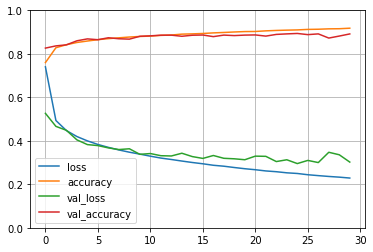

In [151]:
# sequential api를 이용해 만든 모델의 객체인 history는 수행된 에포크가 끝날 때마다 훈련 세트와 검증세크에 대한 손힐과 측정한 지표를 담은 딕셔너리 속성을 갖는다.
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.gca().set_ylim(0,1)
plt.grid(True)

In [152]:
tf.__version__

'2.3.1'

In [153]:
keras.__version__

'2.4.0'

In [154]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 557us/step - loss: 0.3340 - accuracy: 0.8847


[0.3339719772338867, 0.8847000002861023]

In [155]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [156]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [157]:
np.array(class_names)[y_pred]

array(['ankle boot', 'pullover', 'trouser'], dtype='<U11')

# 케라스로 회귀용 다층 퍼셉트론 만들기 

In [158]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing['data'],housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [161]:
model = tf.keras.Sequential([
    keras.layers.Dense(30,activation = 'relu',input_shape = X_train.shape[1:]), # 이 데이터는 이상치가 많기 때문에 과대적합을 막기 위해 은닉층을 한 개만 설정해줬다. 
    keras.layers.Dense(1) # 회귀는 마지막 활성화 함수가 없는 하나의 뉴런이다.
])

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD()
              )
metrics=[keras.metrics.sparse_categorical_accuracy]
model.compile(loss='mean_squared_error',optimizer = 'sgd')

In [162]:
history = model.fit(X_train,y_train, epochs =20, validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20


InvalidArgumentError:  Received a label value of 5 which is outside the valid range of [0, 1).  Label values: 0 0 1 1 3 4 5 0 5 1 3 1 0 1 3 2 1 1 2 2 0 0 1 3 2 3 1 4 1 3 3 1
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-162-7d0e215cd6cd>:1) ]] [Op:__inference_train_function_793187]

Function call stack:
train_function


# 함수형 API를 이용해 복잡한 모델만들기

In [119]:
housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing['data'],housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [120]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # input 객체 만들기. 
hidden1 = keras.layers.Dense(30,activation = 'relu')(input_) # 30개의 뉴런과 ReLU 활성화 함수를 가진 Dense 층을 만든다. 입력과 함께 호출
hidden2 = keras.layers.Dense(30,activation = 'relu')(hidden1) # 윗 줄과 동일
concat = keras.layers.Concatenate()([input_,hidden2]) # 두 번째 층과 입력층을 연결하기
output = keras.layers.Dense(1)(concat) # 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 concat층과 연결
model = keras.Model(inputs = [input_],outputs = [output]) # 케라스 모델로 생성

In [121]:
model.compile(loss='mean_squared_error',optimizer = 'sgd')

In [122]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
363/363 [==============================] - 0s 704us/step - loss: 0.8466 - val_loss: 0.4821
Epoch 2/20
363/363 [==============================] - 0s 546us/step - loss: 0.8039 - val_loss: 2.8531
Epoch 3/20
363/363 [==============================] - 0s 545us/step - loss: 0.8315 - val_loss: 1.1265
Epoch 4/20
363/363 [==============================] - 0s 575us/step - loss: 2.2528 - val_loss: 0.4599
Epoch 5/20
363/363 [==============================] - 0s 539us/step - loss: 0.4832 - val_loss: 0.4743
Epoch 6/20
363/363 [==============================] - 0s 545us/step - loss: 0.5043 - val_loss: 0.4138
Epoch 7/20
363/363 [==============================] - 0s 567us/step - loss: 0.4449 - val_loss: 0.4356
Epoch 8/20
363/363 [==============================] - 0s 545us/step - loss: 0.4442 - val_loss: 0.5147
Epoch 9/20
363/363 [==============================] - 0s 545us/step - loss: 0.4410 - val_loss: 0.7476
Epoch 10/20
363/363 [==============================] - 0s 568us/step - loss: 0.411

In [114]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[4.9303346],
       [1.1752608],
       [1.86251  ]], dtype=float32)

In [8]:
def load_mnist():
    (train_data, train_labels),(test_data,test_labels) = mnist.load_data()
    
    # 텐서플로우가 받는 input은 [배치사이즈,행,열,채널] 이렇게 받기 때문에 차원을 한 개 늘려준다.
    train_data = np.expand_dims(train_data,axis = -1) # 마지막에 차원을 한 개 늘려준다
    test_data = np.expand_dims(test_data,axis = -1)
    
    # 이미지 숫자값의 법위가 0~255인데 이를 정규화 시켜줘야한다.
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0
    
    # shape 을 바꾸는 것이다. One hot incoding 하는 과정인데, 10은 0~9까지 10개의 숫자 값이 있다고 알려준 것이다. 
    # 그 이후 label값에 따른 one hot encoding을 하게 된다.
    train_labels = to_categorical(train_labels,10)
    test_labels = to_categorical(test_labels,10)
    
    return train_data, train_labels, test_data, test_labels

In [10]:
# 이후 네트워크를 구성시키게 되는데
# 첫 번째 flatten()
def flatten():
    return tf.keras.layers.Flatten()

# 두 번째 dense
def dense(channel, weight_init):
    return tf.keras.layers.Dense(units = channel, use_bias = True, kernel_initializer = weight_init)

# relu 쓸 예정
def relu():
    return tf.keras.layers.Activation(tf.keras.activations.relu)

In [15]:
def crete_model(label_dim):
    weight_init = tf.keras.initializers.RandomNormal()
    
    model = tf.keras.Sequential()
    model.add(flatten())
    
    for i in range(2):
        model.add(dense(256,weight_init))
        model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
    
    model.add(dense(label_dim,weight_init))
    
    return model

In [ ]:
def loss_fn(model,images,labels):
    logits = model(images,training = True)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits))